#ANÁLISE DE OCORRENCIA DE REPRODUÇÃO DE QUELONIOS NO BRASIL

O monitoramento da reprodução de quelônios no Brasil desempenha um papel crucial na preservação dessas espécies ameaçadas de extinção. Como parte essencial dos ecossistemas aquáticos e terrestres, os quelônios desempenham funções vitais na manutenção do equilíbrio ecológico, incluindo o controle de populações de outras espécies e a promoção da saúde dos ambientes aquáticos. No entanto, essas espécies enfrentam ameaças significativas de extinção devido à perda de habitat, poluição, pesca predatória e mudanças climáticas. Portanto, o monitoramento da reprodução dos quelônios é fundamental para entender melhor suas populações, identificar ameaças e implementar medidas de conservação eficazes para garantir sua sobrevivência a longo prazo.


---
Turma 2TDSPS

* Projeto Turtle Track
* 96409 - Leonardo Guimarães de Lima Marques
* 97385 - José Carlos da Silva
* 97569 - MARIA LUIZA DE GOVEIA LIMA
* 96906 - MARIANA MARQUES SABIO
* 96881 - Vinícius de Abreu Pena



---
Dados retirados de SIMBA - Sistema de Informação de Monitoramento da Biota Aquática


In [188]:
import pandas as pd
import pandas as pd
import folium
import matplotlib.pyplot as plt
import seaborn as sns
from folium.plugins import HeatMap


In [189]:
file_path = '/content/ocorrencias_de_reproducao_de_quelonios.csv'
df = pd.read_csv(file_path, sep=';')
df.head()

,Código,Estado,Cidade,Praia,Trecho,Condição do céu,Maré,Data/Hora,Ponto - Lat,Ponto - Long,Espécies,Número de vivos,Número de natimortos,Ovos não eclodidos,Dias de incubação
0,284580,Rio de Janeiro,Maricá,Itaipuaçú - Jaconé,Barra de Maricá,Chuvoso,Vazante,04/01/2024 10:04,"-22,95817","-42,75419",Caretta caretta,0,0,0,0
1,279968,Rio de Janeiro,Angra dos Reis,Praia Não Identificada,Praia Não Identificada,Parcialmente nublado,Vazante,08/12/2023 10:23,"-23,15226","-44,323541",Caretta caretta,52,1,69,60
2,279775,Rio de Janeiro,Mangaratiba,Ilha da Marambaia,Sino,Aberto,Vazia,16/12/2023 08:05,"-23,08137","-44,00796",indeterminada,6,2,32,55
3,144715,Rio de Janeiro,Maricá,Itaipuaçú - Jaconé,Barra de Maricá,Nublado,Enchente,22/11/2020 07:40,"-22,95554","-42,71766",Caretta caretta,54,12,13,0
4,119302,Rio de Janeiro,Niterói,Região Oceânica,Itacoatiara,Indeterminado,Indeterminado,04/03/2020 10:53,"-22,97406","-43,03614",Chelonia mydas,0,0,0,0


In [190]:
#Verificando valores faltantes
print(df.isnull().sum())

Código                  0
Estado                  0
Cidade                  0
Praia                   0
Trecho                  0
Condição do céu         0
Maré                    0
Data/Hora               0
Ponto - Lat             0
Ponto - Long            0
Espécies                0
Número de vivos         0
Número de natimortos    0
Ovos não eclodidos      0
Dias de incubação       0
dtype: int64


In [191]:
#Convertendo a coluna de Data/Hora
df['Data/Hora'] = pd.to_datetime(df['Data/Hora'], format='%d/%m/%Y %H:%M')

In [192]:
print(df.describe())

              Código                      Data/Hora  Número de vivos  \
count   11875.000000                          11875     11875.000000   
mean   198864.638232  2022-02-15 13:58:02.314105344        12.615158   
min     49426.000000            2018-01-05 10:07:00         0.000000   
25%    117454.500000            2020-01-25 08:55:00         0.000000   
50%    232498.000000            2023-02-10 04:39:00         0.000000   
75%    250974.500000            2023-07-28 09:08:00         0.000000   
max    286127.000000            2024-02-07 05:54:00       182.000000   
std     68005.005780                            NaN        31.697074   

       Número de natimortos  Ovos não eclodidos  Dias de incubação  
count          11875.000000        11875.000000       11875.000000  
mean               0.638568            4.805811          12.271663  
min                0.000000            0.000000           0.000000  
25%                0.000000            0.000000           0.000000  
50%   

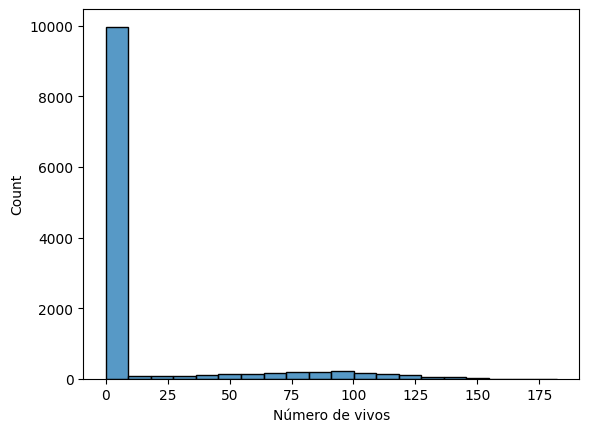

In [193]:
#Distribuição de "Número de vivos"
sns.histplot(df['Número de vivos'], bins=20)
plt.show()

In [194]:
#Substituindo vírgulas por pontos nas colunas de latitude e longitude
df['Ponto - Lat'] = df['Ponto - Lat'].str.replace(',', '.').astype(float)
df['Ponto - Long'] = df['Ponto - Long'].str.replace(',', '.').astype(float)


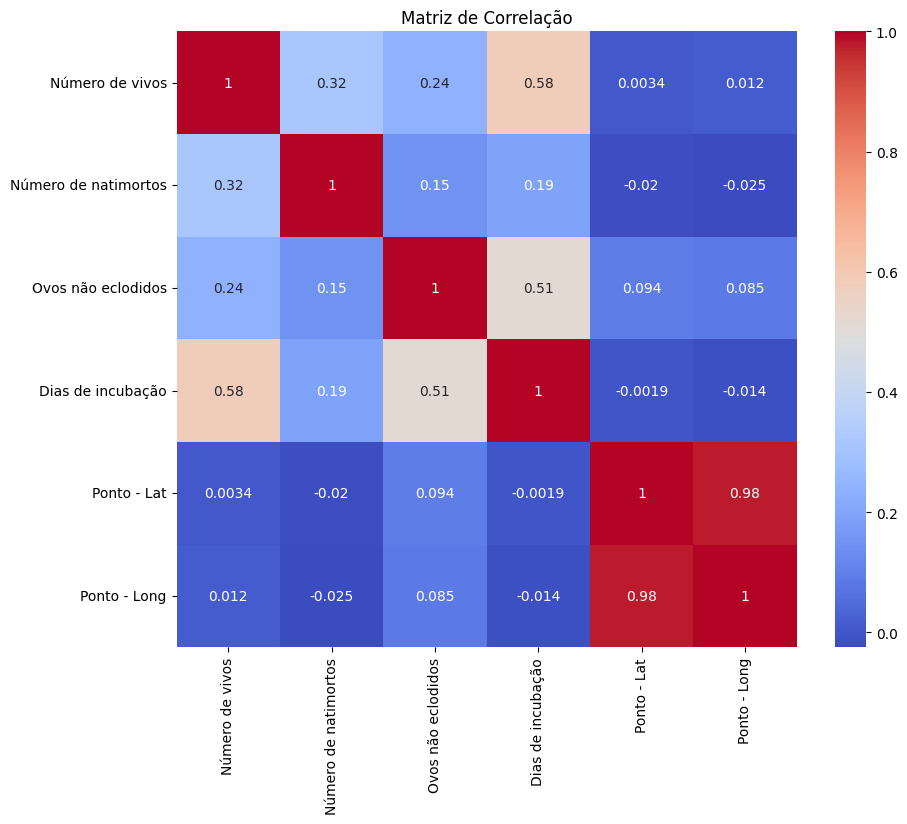

In [195]:
#Convertendo as colunas numéricas
numerical_columns = ['Número de vivos', 'Número de natimortos', 'Ovos não eclodidos', 'Dias de incubação', 'Ponto - Lat', 'Ponto - Long']
df_numerical = df[numerical_columns]

#Calculando a matriz de correlação
correlation_matrix = df_numerical.corr()

#Plot do heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

In [196]:
#Preenchendo valores faltantes em coordenadas com a média
df['Ponto - Lat'] = df['Ponto - Lat'].fillna(df['Ponto - Lat'].mean())
df['Ponto - Long'] = df['Ponto - Long'].fillna(df['Ponto - Long'].mean())

#Preenchendo valores categóricos com a moda
df['Condição do céu'] = df['Condição do céu'].fillna(df['Condição do céu'].mode()[0])
df['Maré'] = df['Maré'].fillna(df['Maré'].mode()[0])

#Verificando se a conversão e preenchimento deram certo
print(df[['Ponto - Lat', 'Ponto - Long']].head())
print(df.dtypes)

#Criando um mapa
latitude_central = df['Ponto - Lat'].mean()
longitude_central = df['Ponto - Long'].mean()
mapa = folium.Map(location=[latitude_central, longitude_central], zoom_start=10)

#Preparando os dados para o HeatMap
heat_data = [[row['Ponto - Lat'], row['Ponto - Long']] for index, row in df.iterrows()]

#Adicionando HeatMap ao mapa
HeatMap(heat_data).add_to(mapa)

#Exportando o mapa em HTML
mapa.save('heatmap_com_pontos.html')
print("Heatmap gerado com sucesso e salvo como 'heatmap_com_pontos.html'.")

#Mostrando o mapa
mapa

   Ponto - Lat  Ponto - Long
0    -22.95817    -42.754190
1    -23.15226    -44.323541
2    -23.08137    -44.007960
3    -22.95554    -42.717660
4    -22.97406    -43.036140
Código                           int64
Estado                          object
Cidade                          object
Praia                           object
Trecho                          object
Condição do céu                 object
Maré                            object
Data/Hora               datetime64[ns]
Ponto - Lat                    float64
Ponto - Long                   float64
Espécies                        object
Número de vivos                  int64
Número de natimortos             int64
Ovos não eclodidos               int64
Dias de incubação                int64
dtype: object
Heatmap gerado com sucesso e salvo como 'heatmap_com_pontos.html'.


Sumário Estatístico:
        Número de vivos  Número de natimortos  Ovos não eclodidos
count     11875.000000          11875.000000        11875.000000
mean         12.615158              0.638568            4.805811
std          31.697074              4.164047           16.573620
min           0.000000              0.000000            0.000000
25%           0.000000              0.000000            0.000000
50%           0.000000              0.000000            0.000000
75%           0.000000              0.000000            0.000000
max         182.000000            148.000000          164.000000

Soma e Média por Cidade:
                                Cidade Número de vivos             \
                                                  sum       mean   
0                            Anchieta              35   8.750000   
1                      Angra dos Reis              52  52.000000   
2                             Aracaju           13844  17.218905   
3                         

<ipython-input-197-8598c175e501>:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Número de vivos', y='Cidade', data=df, estimator=sum, ci=None)
<ipython-input-197-8598c175e501>:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Número de natimortos', y='Cidade', data=df, estimator=sum, ci=None)
<ipython-input-197-8598c175e501>:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Ovos não eclodidos', y='Cidade', data=df, estimator=sum, ci=None)


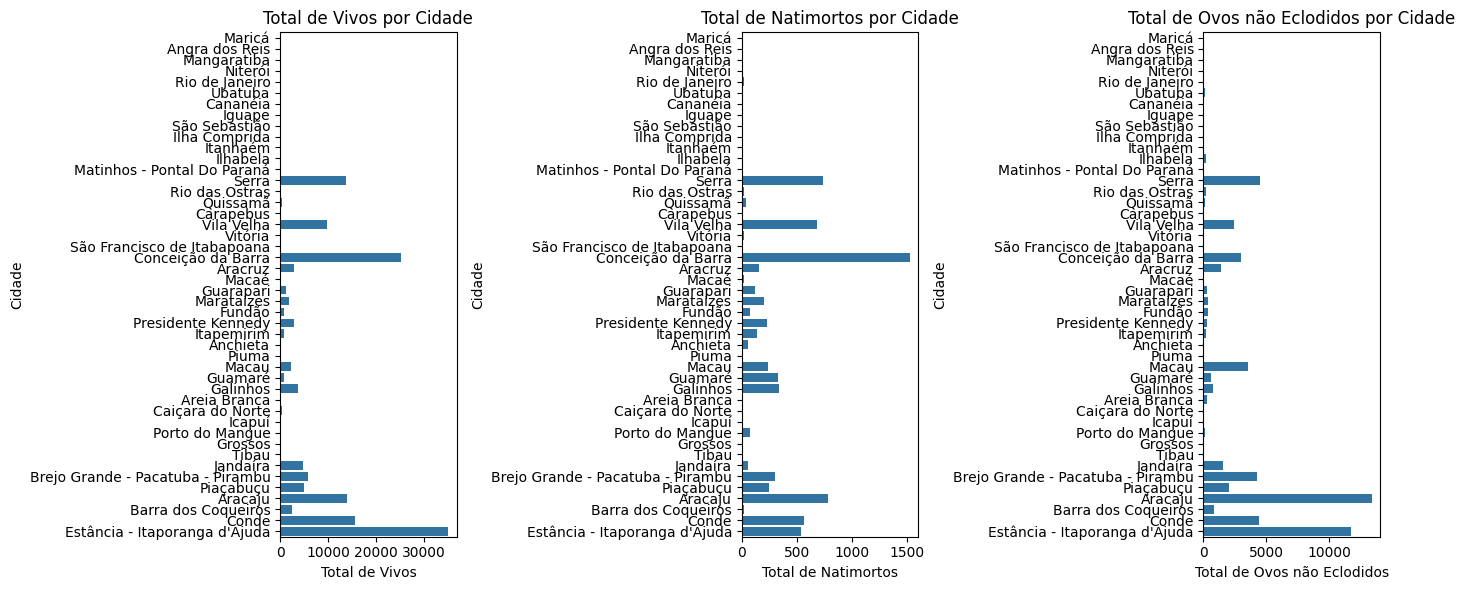

In [197]:
#Garantindo que os dados numéricos estão no formato correto
df['Número de vivos'] = pd.to_numeric(df['Número de vivos'], errors='coerce')
df['Número de natimortos'] = pd.to_numeric(df['Número de natimortos'], errors='coerce')
df['Ovos não eclodidos'] = pd.to_numeric(df['Ovos não eclodidos'], errors='coerce')

#Estatísticas descritivas
desc_stats = df[['Número de vivos', 'Número de natimortos', 'Ovos não eclodidos']].describe()
print("Sumário Estatístico:\n", desc_stats)

#Agrupando por Cidade e calcular soma e média
grouped_cities = df.groupby('Cidade')[['Número de vivos', 'Número de natimortos', 'Ovos não eclodidos']].agg(['sum', 'mean']).reset_index()
print("\nSoma e Média por Cidade:\n", grouped_cities)

#Visualização das Distribuições
plt.figure(figsize=(14, 6))

#Número de vivos por Cidade
plt.subplot(1, 3, 1)
sns.barplot(x='Número de vivos', y='Cidade', data=df, estimator=sum, ci=None)
plt.title('Total de Vivos por Cidade')
plt.xlabel('Total de Vivos')
plt.ylabel('Cidade')

#Número de natimortos por Cidade
plt.subplot(1, 3, 2)
sns.barplot(x='Número de natimortos', y='Cidade', data=df, estimator=sum, ci=None)
plt.title('Total de Natimortos por Cidade')
plt.xlabel('Total de Natimortos')
plt.ylabel('Cidade')

#Ovos não eclodidos por Cidade
plt.subplot(1, 3, 3)
sns.barplot(x='Ovos não eclodidos', y='Cidade', data=df, estimator=sum, ci=None)
plt.title('Total de Ovos não Eclodidos por Cidade')
plt.xlabel('Total de Ovos não Eclodidos')
plt.ylabel('Cidade')

plt.tight_layout()
plt.show()

#2 ETAPA

Redes neurais: Esta rede neural é um modelo de regressão que visa prever o número de tartaruguinhas nascidas vivas, o número de natimortos e o número de ovos não eclodidos com base em várias características, como latitude, longitude, espécie e outras. Utiliza uma arquitetura de rede neural artificial, com camadas densas, que aprende padrões nos dados de treinamento e tenta generalizar esses padrões para fazer previsões precisas sobre os dados de teste. A normalização dos dados e o tratamento de valores ausentes são realizados para garantir um desempenho adequado do modelo. Após o treinamento, o modelo é avaliado em dados de teste para verificar sua precisão na previsão do número de crias vivas, natimortos e ovos não eclodidos.

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



In [199]:
#Tirando colunas irrelevantes
colunas_relevantes = ['Estado', 'Cidade', 'Praia', 'Trecho', 'Condição do céu', 'Maré',
                      'Ponto - Lat', 'Ponto - Long', 'Número de vivos', 'Número de natimortos', 'Ovos não eclodidos']
df = df[colunas_relevantes]


#Convertendo colunas numéricas
df['Número de vivos'] = pd.to_numeric(df['Número de vivos'], errors='coerce')
df['Número de natimortos'] = pd.to_numeric(df['Número de natimortos'], errors='coerce')
df['Ovos não eclodidos'] = pd.to_numeric(df['Ovos não eclodidos'], errors='coerce')

#Tratando valores faltantes
df.dropna(inplace=True)

#Separar características e rótulos
X = df.drop(columns=['Número de vivos', 'Número de natimortos', 'Ovos não eclodidos'])
y_vivos = df['Número de vivos']
y_natimortos = df['Número de natimortos']
y_ovos = df['Ovos não eclodidos']

#Dividindo em conjuntos de treinamento e teste
X_train, X_test, y_vivos_train, y_vivos_test = train_test_split(X, y_vivos, test_size=0.2, random_state=42)
_, _, y_natimortos_train, y_natimortos_test = train_test_split(X, y_natimortos, test_size=0.2, random_state=42)
_, _, y_ovos_train, y_ovos_test = train_test_split(X, y_ovos, test_size=0.2, random_state=42)

#Definindo as colunas categóricas e suas categorias
categorical_cols = {
    'Estado': df['Estado'].unique(),
    'Cidade': df['Cidade'].unique(),
    'Praia': df['Praia'].unique(),
    'Trecho': df['Trecho'].unique(),
    'Condição do céu': df['Condição do céu'].unique(),
    'Maré': df['Maré'].unique()
}

#Aplicando codificação one-hot para as colunas categóricas
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(categories=[categorical_cols[col] for col in categorical_cols]), list(categorical_cols.keys()))], remainder='passthrough')
X_train_encoded = ct.fit_transform(X_train)
X_test_encoded = ct.transform(X_test)

#Normalizando os dados numéricos
scaler = StandardScaler(with_mean=False)
X_train_encoded[:, -4:] = scaler.fit_transform(X_train_encoded[:, -4:])
X_test_encoded[:, -4:] = scaler.transform(X_test_encoded[:, -4:])

#Conferindo os shapes dos dados preparados
print("Shape de X_train_encoded:", X_train_encoded.shape)
print("Shape de X_test_encoded:", X_test_encoded.shape)
print("Shape de y_vivos_train:", y_vivos_train.shape)
print("Shape de y_vivos_test:", y_vivos_test.shape)

#Função para criar o modelo
def criar_modelo(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_shape,)),
        Dense(64, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

Shape de X_train_encoded: (9500, 244)
Shape de X_test_encoded: (2375, 244)
Shape de y_vivos_train: (9500,)
Shape de y_vivos_test: (2375,)


<ipython-input-199-b2aff1b6bf96>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Número de vivos'] = pd.to_numeric(df['Número de vivos'], errors='coerce')
<ipython-input-199-b2aff1b6bf96>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Número de natimortos'] = pd.to_numeric(df['Número de natimortos'], errors='coerce')
<ipython-input-199-b2aff1b6bf96>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [200]:
#Convertendo matrizes esparsas para arrays NumPy
X_train_encoded = X_train_encoded.toarray()
X_test_encoded = X_test_encoded.toarray()

#Treinando o modelo para "Número de vivos"
modelo_vivos = criar_modelo(input_shape=X_train_encoded.shape[1])
hist_vivos = modelo_vivos.fit(X_train_encoded, y_vivos_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
238/238 [==============================] - 1s 3ms/step - loss: 1001.5818 - mae: 19.6279 - val_loss: 821.9240 - val_mae: 18.6984
Epoch 2/50
238/238 [==============================] - 1s 3ms/step - loss: 825.8236 - mae: 18.2065 - val_loss: 732.7283 - val_mae: 15.6046
Epoch 3/50
238/238 [==============================] - 1s 3ms/step - loss: 789.9661 - mae: 17.1679 - val_loss: 720.6413 - val_mae: 16.1079
Epoch 4/50
238/238 [==============================] - 1s 3ms/step - loss: 781.9727 - mae: 16.9725 - val_loss: 717.3199 - val_mae: 16.3292
Epoch 5/50
238/238 [==============================] - 1s 2ms/step - loss: 778.6758 - mae: 16.7917 - val_loss: 717.8181 - val_mae: 15.8412
Epoch 6/50
238/238 [==============================] - 1s 3ms/step - loss: 775.0815 - mae: 16.6792 - val_loss: 715.9660 - val_mae: 15.8572
Epoch 7/50
238/238 [==============================] - 1s 4ms/step - loss: 772.8361 - mae: 16.7119 - val_loss: 714.1944 - val_mae: 15.7994
Epoch 8/50
238/238 [=============

In [201]:
#Avaliando o modelo nos dados de teste
loss, accuracy = modelo_vivos.evaluate(X_test_encoded, y_vivos_test)
print('Perda:', loss)
print('Acurácia:', accuracy)

75/75 [==============================] - 0s 3ms/step - loss: 752.7646 - mae: 15.6644
Perda: 752.7646484375
Acurácia: 15.664411544799805


In [202]:
#Previsões nos dados de teste
predictions = modelo_vivos.predict(X_test_encoded)

75/75 [==============================] - 0s 3ms/step


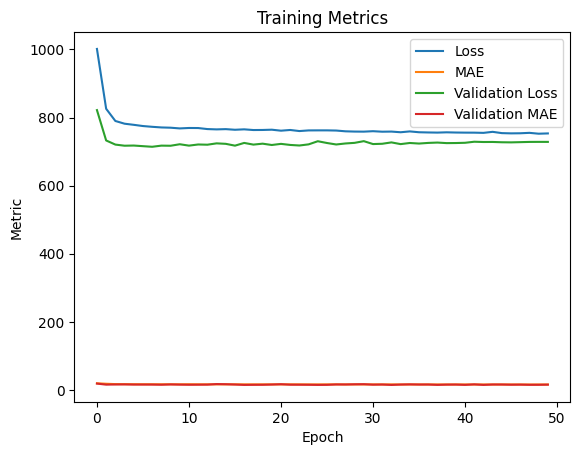

In [203]:
#Visualizando a perda e a precisão ao longo do treinamento
plt.plot(hist_vivos.history['loss'], label='Loss')
plt.plot(hist_vivos.history['mae'], label='MAE')
plt.plot(hist_vivos.history['val_loss'], label='Validation Loss')
plt.plot(hist_vivos.history['val_mae'], label='Validation MAE')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Training Metrics')
plt.show()

3 ETAPA

Optamos por chamar o arquivo novamente para que as transformacões anteriores não afetassem o treino e aplicação das técnicas.

In [204]:
df = pd.read_csv(file_path, sep=';')

#Selecionando apenas as colunas necessárias
colunas_necessarias = ['Data/Hora', 'Ponto - Lat', 'Ponto - Long', 'Espécies', 'Número de vivos', 'Número de natimortos', 'Ovos não eclodidos']
df_reduzido = df[colunas_necessarias].copy()

#Visualizando o novo DataFrame
print(df_reduzido.head())

          Data/Hora Ponto - Lat Ponto - Long         Espécies  \
0  04/01/2024 10:04   -22,95817    -42,75419  Caretta caretta   
1  08/12/2023 10:23   -23,15226   -44,323541  Caretta caretta   
2  16/12/2023 08:05   -23,08137    -44,00796    indeterminada   
3  22/11/2020 07:40   -22,95554    -42,71766  Caretta caretta   
4  04/03/2020 10:53   -22,97406    -43,03614   Chelonia mydas   

   Número de vivos  Número de natimortos  Ovos não eclodidos  
0                0                     0                   0  
1               52                     1                  69  
2                6                     2                  32  
3               54                    12                  13  
4                0                     0                   0  


In [205]:
#Inicializando o codificador de rótulos
label_encoder = LabelEncoder()

#Codificando a coluna "Espécies" como números inteiros
df_reduzido['Espécies'] = label_encoder.fit_transform(df_reduzido['Espécies'])

#Exibindo as primeiras linhas do DataFrame com a coluna "Espécies" codificada
print(df_reduzido.head())

          Data/Hora Ponto - Lat Ponto - Long  Espécies  Número de vivos  \
0  04/01/2024 10:04   -22,95817    -42,75419         0                0   
1  08/12/2023 10:23   -23,15226   -44,323541         0               52   
2  16/12/2023 08:05   -23,08137    -44,00796         5                6   
3  22/11/2020 07:40   -22,95554    -42,71766         0               54   
4  04/03/2020 10:53   -22,97406    -43,03614         1                0   

   Número de natimortos  Ovos não eclodidos  
0                     0                   0  
1                     1                  69  
2                     2                  32  
3                    12                  13  
4                     0                   0  


In [206]:
#Separando os dados em features (X) e target (y)
X = df_reduzido.drop(columns=['Número de vivos'])
y = df_reduzido['Número de vivos']

#Dividindo os dados em conjuntos de treinamento e teste (80% treinamento, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Verificando as dimensões dos conjuntos de treinamento e teste
print("Shape de X_train:", X_train.shape)
print("Shape de X_test:", X_test.shape)
print("Shape de y_train:", y_train.shape)
print("Shape de y_test:", y_test.shape)

Shape de X_train: (9500, 6)
Shape de X_test: (2375, 6)
Shape de y_train: (9500,)
Shape de y_test: (2375,)


In [207]:
#colunas numéricas para normalização
colunas_numericas = X_train.select_dtypes(include=['float64', 'int64']).columns

#Pré-processamento e normalização dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[colunas_numericas])
X_test_scaled = scaler.transform(X_test[colunas_numericas])

In [208]:
#modelo
modelo = Sequential()
modelo.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
modelo.add(Dense(32, activation='relu'))
modelo.add(Dense(1, activation='linear'))

#Compilando o modelo
modelo.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mae'])

In [209]:
#Treinando o modelo
hist = modelo.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
238/238 [==============================] - 3s 9ms/step - loss: 12.4823 - mae: 12.4823 - val_loss: 10.9712 - val_mae: 10.9712
Epoch 2/50
238/238 [==============================] - 1s 3ms/step - loss: 11.4052 - mae: 11.4052 - val_loss: 10.0198 - val_mae: 10.0198
Epoch 3/50
238/238 [==============================] - 1s 3ms/step - loss: 10.5532 - mae: 10.5532 - val_loss: 9.4916 - val_mae: 9.4916
Epoch 4/50
238/238 [==============================] - 1s 4ms/step - loss: 9.8539 - mae: 9.8539 - val_loss: 8.9235 - val_mae: 8.9235
Epoch 5/50
238/238 [==============================] - 1s 2ms/step - loss: 9.2797 - mae: 9.2797 - val_loss: 8.3314 - val_mae: 8.3314
Epoch 6/50
238/238 [==============================] - 1s 3ms/step - loss: 8.6895 - mae: 8.6895 - val_loss: 7.7082 - val_mae: 7.7082
Epoch 7/50
238/238 [==============================] - 1s 3ms/step - loss: 8.1211 - mae: 8.1211 - val_loss: 7.1121 - val_mae: 7.1121
Epoch 8/50
238/238 [==============================] - 1s 2ms/step 

In [210]:
#desempenho do modelo nos dados de teste
loss, mae = modelo.evaluate(X_test_scaled, y_test)
print("Loss:", loss)
print("MAE:", mae)


75/75 [==============================] - 0s 2ms/step - loss: 5.0633 - mae: 5.0633
Loss: 5.063291072845459
MAE: 5.063291072845459


In [211]:
#Fazendo previsões nos dados de teste
y_pred = modelo.predict(X_test_scaled)

#Algumas previsões
for i in range(10):
    print("Valor real:", y_test.iloc[i], " - Valor previsto:", y_pred[i][0])

75/75 [==============================] - 0s 1ms/step
Valor real: 0  - Valor previsto: -0.04940921
Valor real: 0  - Valor previsto: -0.04940921
Valor real: 0  - Valor previsto: -0.04940921
Valor real: 0  - Valor previsto: -0.04940921
Valor real: 0  - Valor previsto: -0.04940921
Valor real: 0  - Valor previsto: -0.04940921
Valor real: 6  - Valor previsto: -1.6958406
Valor real: 0  - Valor previsto: -0.04940921
Valor real: 0  - Valor previsto: -0.04940921
Valor real: 0  - Valor previsto: -0.04940921


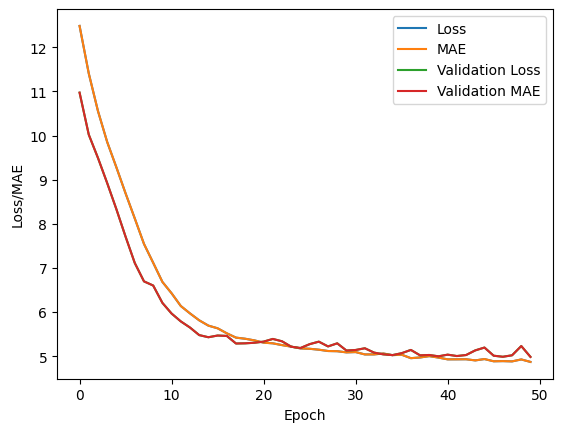

In [212]:
#Visualizando a perda e o MAE ao longo do treinamento
plt.plot(hist.history['loss'], label='Loss')
plt.plot(hist.history['mae'], label='MAE')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.plot(hist.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Loss/MAE')
plt.legend()
plt.show()

TENTATIVA DE RNN

In [213]:
#Selecionando apenas as colunas necessárias
cols_needed = ['Data/Hora', 'Ponto - Lat', 'Ponto - Long', 'Espécies', 'Número de vivos', 'Número de natimortos', 'Ovos não eclodidos']
df_reduzido = df[cols_needed].copy()

#Convertendo a coluna 'Data/Hora' para o tipo datetime
df_reduzido['Data/Hora'] = pd.to_datetime(df_reduzido['Data/Hora'], format='%d/%m/%Y %H:%M')

#Corrigindo o formato dos valores das colunas 'Ponto - Lat' e 'Ponto - Long'
df_reduzido['Ponto - Lat'] = df_reduzido['Ponto - Lat'].str.replace(',', '.').astype(float)
df_reduzido['Ponto - Long'] = df_reduzido['Ponto - Long'].str.replace(',', '.').astype(float)

#Normalizando os dados
scaler = StandardScaler()
df_reduzido[['Ponto - Lat', 'Ponto - Long']] = scaler.fit_transform(df_reduzido[['Ponto - Lat', 'Ponto - Long']])

#Dividindo os dados em features (X) e target (y)
X_rnn = df_reduzido[['Ponto - Lat', 'Ponto - Long', 'Espécies', 'Número de natimortos', 'Ovos não eclodidos']]
y_rnn = df_reduzido['Número de vivos']

#Dividindo os dados em conjuntos de treinamento e teste
X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(X_rnn, y_rnn, test_size=0.2, random_state=42)

#Verificando as dimensões dos conjuntos de treinamento e teste
print("Shape de X_train_rnn:", X_train_rnn.shape)
print("Shape de X_test_rnn:", X_test_rnn.shape)
print("Shape de y_train_rnn:", y_train_rnn.shape)
print("Shape de y_test_rnn:", y_test_rnn.shape)

Shape de X_train_rnn: (9500, 5)
Shape de X_test_rnn: (2375, 5)
Shape de y_train_rnn: (9500,)
Shape de y_test_rnn: (2375,)


In [214]:
#one-hot
onehot_encoder = OneHotEncoder(sparse=False)

#Ajustando e transformando a coluna "Espécies" em codificação one-hot para os dados de treinamento
species_encoded = onehot_encoder.fit_transform(X_train_rnn[['Espécies']])

#nomes das colunas codificadas
encoded_species_names = onehot_encoder.get_feature_names_out(['Espécies'])

#Convertendo a matriz resultante em um DataFrame
species_encoded_df = pd.DataFrame(species_encoded, columns=encoded_species_names)

#Concatenando as colunas codificadas ao DataFrame original para os dados de treinamento
X_train_encoded_rnn = pd.concat([X_train_rnn.drop(columns=['Espécies']), species_encoded_df], axis=1)

#Normalizando os dados de treinamento
scaler_rnn = StandardScaler()
X_train_encoded_rnn[['Ponto - Lat', 'Ponto - Long', 'Número de natimortos', 'Ovos não eclodidos']] = scaler_rnn.fit_transform(X_train_encoded_rnn[['Ponto - Lat', 'Ponto - Long', 'Número de natimortos', 'Ovos não eclodidos']])

#Ajustando e transformar a coluna "Espécies" em codificação one-hot para os dados de teste
species_encoded_test = onehot_encoder.transform(X_test_rnn[['Espécies']])

species_encoded_test_df = pd.DataFrame(species_encoded_test, columns=encoded_species_names)

#Juntando as colunas codificadas ao DataFrame original para os dados de teste
X_test_encoded_rnn = pd.concat([X_test_rnn.drop(columns=['Espécies']), species_encoded_test_df], axis=1)

#Normalizando os dados de teste
X_test_encoded_rnn[['Ponto - Lat', 'Ponto - Long', 'Número de natimortos', 'Ovos não eclodidos']] = scaler_rnn.transform(X_test_encoded_rnn[['Ponto - Lat', 'Ponto - Long', 'Número de natimortos', 'Ovos não eclodidos']])

#Verificando as primeiras linhas dos DataFrames codificados e normalizados
print("Dados de treinamento:")
print(X_train_encoded_rnn.head())
print("\nDados de teste:")
print(X_test_encoded_rnn.head())

Dados de treinamento:
       Ponto - Lat  Ponto - Long  Número de natimortos  Ovos não eclodidos  \
6222      0.590635      0.579342             -0.152412           -0.290695   
10125     0.657240      0.706053             -0.152412            0.445438   
1506     -1.174652     -0.998199             -0.152412            7.070635   
2820     -1.450249     -1.472561             -0.152412           -0.290695   
5377      0.657051      0.705549             -0.152412           -0.290695   

       Espécies_Caretta caretta  Espécies_Chelonia mydas  \
6222                        0.0                      0.0   
10125                       NaN                      NaN   
1506                        0.0                      0.0   
2820                        0.0                      0.0   
5377                        0.0                      0.0   

       Espécies_Dermochelys coriacea  Espécies_Eretmochelys imbricata  \
6222                             0.0                              0.0   
10

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [215]:
#Selecionando um número aleatório de índices
indices_test = np.random.choice(len(X_test_rnn), size=len(y_test_rnn), replace=False)

#Selecionando as amostras correspondentes com base nos índices
X_test_rnn_resized = X_test_rnn.iloc[indices_test]

print("Número de amostras em X_test_rnn_resized:", X_test_rnn_resized.shape[0])
print("Número de amostras em y_test_rnn:", y_test_rnn.shape[0])


Número de amostras em X_test_rnn_resized: 2375
Número de amostras em y_test_rnn: 2375


In [216]:
#Definindo a arquitetura da RNN
modelo_rnn = Sequential()
modelo_rnn.add(SimpleRNN(64, input_shape=(X_train_encoded_rnn_resized.shape[1], 1), activation='relu'))
modelo_rnn.add(Dense(32, activation='relu'))
modelo_rnn.add(Dense(1, activation='linear'))

#Compilando o modelo
modelo_rnn.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mae'])

#Treinando o modelo
hist_rnn = modelo_rnn.fit(X_train_encoded_rnn_resized.values.reshape((X_train_encoded_rnn_resized.shape[0], X_train_encoded_rnn_resized.shape[1], 1)),
                           y_train_rnn_resized.values, epochs=50, batch_size=32, validation_split=0.2)

#Avaliando o modelo nos dados de teste
resultado_teste_rnn = modelo_rnn.evaluate(X_test_encoded_rnn.values.reshape((X_test_encoded_rnn.shape[0], X_test_encoded_rnn.shape[1], 1)),
                                          y_test_rnn.values)
print("Loss:", resultado_teste_rnn[0])
print("MAE:", resultado_teste_rnn[1])

Epoch 1/50
238/238 [==============================] - 5s 13ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/50
238/238 [==============================] - 1s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/50
238/238 [==============================] - 1s 6ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/50
238/238 [==============================] - 1s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/50
238/238 [==============================] - 1s 6ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/50
238/238 [==============================] - 1s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/50
238/238 [==============================] - 1s 6ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/50
238/238 [==============================] - 1s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/50
238/238 [===================

ValueError: Data cardinality is ambiguous:
  x sizes: 4274
  y sizes: 2375
Make sure all arrays contain the same number of samples.

#CONCLUSÃO

Apesar das promissoras capacidades das redes neurais, é essencial reconhecer os desafios que podem surgir durante sua aplicação nesta base de dados. Desvios de perda relativamente altos podem indicar dificuldades na captura de todos os padrões presentes nos dados ou na generalização do modelo para novos exemplos. Portanto, é fundamental realizar uma análise mais aprofundada desses desvios e explorar diferentes arquiteturas de modelos e técnicas de regularização para melhor adaptação dos dados. Além disso, a combinação de redes neurais com outros métodos de aprendizado de máquina pode ser benéfica para abordar as complexidades inerentes aos dados e melhorar o desempenho geral do modelo. Ainda assim, é notável o aumento de registros de ninhos, também do número e nascidos vivos em regiões como ES e AL e ainda que o numero de mortos seja alto, a proporção de vivos é muito maior, tudo isso graças ao monitoramento constante dos orgão responsáveis, que são fundamentais para zelar por essas espécies, que hoje estão sob ameaça de extinsão.Para um monitoramento mais completo das espécies, seria necessário dados mais aprofundados sobre encalhe, causas de morte, contaminação por óleo ou presença de plástico no corpo do animal, assim poderiamos traçar planos mais concretos de preservação e ação para mitigar a extinção dessas espécies de tartarugas.